In [2]:
# Нахождение вероятностей СМО и работа мат.модели
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import math
import random
import time
start_time = time.time()
greek_letterz=[chr(code) for code in range(945,970)]
def alfa(n):           # Вероятность встать в очередь
    return 1/n
def S(k,lamb,nu):
    return (lamb/nu)**k
def s(k,lamb,nu):
    b=1
    for i in range(k):
        b=b*alfa(i+1)
    return b*(nu/lamb)**k
def P0(m,lamb,nu):     # Считаем выражения в скобках для P_0
    ro=lamb/nu
    w = sum([ro**i for i in range(1,m+1)])+math.exp(ro**(-1))
    return w
def P_i(m,lamb,nu): # Считаем вероятности, когда есть товар на складе
    Pi=[]
    c1= P0(m,lamb,nu)
    Pi.append(1/c1)
    for i in range(1,m+1):
        Pi.append(S(i,lamb,nu)/c1)
    return Pi

lamb = 5  # интенсивность прихода вещи на склад
nu = 3    # интенсивность прихода покупателей 
p = 900   # прибыль с продажи
c = 50    # затраты на хранение одной единицы продукции
q = 300   # за переполнение склада
F=10      # содержание склада
def Pribl(m,lamb,nu): # расчет средней прибыли
    Pi = P_i(m,lamb,nu)
    summa = 0
    summa1 = 0
    for i in range(1,m+1):
        summa+=Pi[i]*i
        summa1+=Pi[i]
    H = nu*summa1*p - lamb*Pi[m]*q - F*m - summa*c + lamb*(math.exp((nu/lamb))-1)*p*Pi[0]
    return H


Y=[]
m= list(range(1,20)) 
for i in m:
    Y.append(Pribl(i,lamb,nu))
max1=np.argmax(Y)+1
if lamb==nu:
    m_op=(-(c*math.exp(1)+2*F*math.exp(1))+((c*math.exp(1)+2*F*math.exp(1))**2+(c+2*F)*(2*lamb*(p+q)-math.exp(1)*(c-2*F*math.exp(1))))**(1/2)
         )/(c+2*F)
    H_max1=Pribl(math.ceil(m_op),lamb,nu)
    H_max2=Pribl(math.floor(m_op),lamb,nu)
    print("По формуле", m_op)
    print("Средняя прибыль и размер склада ", H_max1, math.ceil(m_op))
    print("Средняя прибыль и размер склада ", H_max2, math.floor(m_op))
print("Y=",Y)
print("max = ", np.argmax(Y)+1)
print("Максимальная средняя прибыль = ", max(Y))
print("время работы",  time.time()- start_time )



Y= [1599.7869363005793, 1762.7565744569058, 1823.815808372413, 1832.962319489944, 1813.579557884123, 1777.8218771421875, 1732.4244408394284, 1681.2672213377978, 1626.6383803772296, 1569.906408571626, 1511.896616315729, 1453.1091734926752, 1393.848058569435, 1334.2983064944976, 1274.5726442812954, 1214.7397745986905, 1154.8415745786917, 1094.903569542742, 1034.9413162023075]
max =  4
Максимальная средняя прибыль =  1832.962319489944
время работы 0.0012819766998291016


In [3]:
#Задача с размером склада. Имитация
import random
import numpy as np
import math
start_time = time.time()
lamb = 5     # интенсивность прихода вещи на склад
nu =3        # интенсивность прихода покупателей        
Time=1000 # время для расчетов имитации
p = 900      # прибыль с продажи
c = 50       # затраты на хранение одной единицы продукции
q = 300      # штраф за переполнение склада
F=10         # затраты на содержание

def f(x):     # вероятность встать в очередь 
    return 1/x
def H_m(M,lamb,nu,q,p,c, F,Time): # имитация
    H=0   # прибыль
    s=0   # товара на складе
    queqe=0      # Количество людей в очереди 
    tovar=0      # Сколько всего продано товара
    people=0     # Сколько клиентов ушло
    vozvrat=0    # Сколько произошло отказов от товара
    max_queqe=0  # максимальная длина очереди, которая образовалась
    times=[]
    times.append((1,0+random.expovariate(lamb)))  # моделируем первое время прихода товара
    times.append((-1,0+random.expovariate(nu)))   # моделируем первое время прихода покупателя
    times.sort(key=lambda x: x[1])                # сортируем по возрастанию
    t=0
    while times[0][1] <= Time: 
        H = H-(c*s+M*F)*(times[0][1]-t)  # затраты на аренду и хранения 
        t=times[0][1]
        if times[0][0] == 1: # пришел товар
            if s+1 > M:
                H-=q
                vozvrat+=1
            else: 
                if queqe>0: 
                    H+=p
                    queqe-=1
                    tovar+=1
                else:
                    s+=1
            times.append((1,t+random.expovariate(lamb))) # моделируем следующее время приходв товара
            times.pop(0)                                 # удаляем заявку товар из списка
            times.sort(key=lambda x: x[1])               # сортируем по возрастанию
        else:    # пришел покупатель            
            if s==0:
                r = random.random()
                if r < f(queqe+1):
                    queqe+=1
                    if  max_queqe < queqe:
                            max_queqe = queqe
                else:
                    people+=1
            else:
                s-=1
                H+=p
                tovar+=1 
            times.append((-1,t+random.expovariate(nu)))  # моделируем следующее время приходв покупателя
            times.pop(0)                                 # удаляем заявку товар из списка
            times.sort(key=lambda x: x[1])               # сортируем по возрастанию
    return H, tovar, people, vozvrat, max_queqe
def out(H,m):
    print("Размер склада = ",m)
    print("Прибыль = ",H[0]/Time)
    print("Количесвто проданного товара = ",H[1])
    print("Количество людей, отказавшихся от товара ",H[2])
    print("Количество возвращенного товара",H[3])
    print("Максимальная очередь",H[4])
    print()
    
def iteration(M,lamb,nu,n,q,p,c,f,T):
    H_sr =[] 
    for i in M:
        H_test = 0
        for j in range(n):
            H_test += H_m(i,lamb,nu,q,p,c,f,T)[0]/T
        H_sr.append(H_test/n)
    return H_sr    

m= list(range(1,20))    
n=1000
W = iteration(m,lamb,nu,n,q,p,c,F,Time)

# m= list(range(1,20)) 
# W=[]
# for i in m:
#     W.append(H_m(i,lamb,nu,q,p,c,F,Time)[0]/Time)

max2=np.argmax(W)+1
print("W=", W)
print("время работы",  time.time()- start_time )               
# print("Количесвто проданного товара = ",H_m(4,lamb,nu,q,p,c,F,Time)[1])


W= [1597.9453630630067, 1762.761168153519, 1823.7518008787956, 1833.1655837522305, 1812.0533750256309, 1778.1926964826564, 1733.0264321922189, 1681.4657020687907, 1632.1037891069539, 1570.3592990022694, 1513.5737010006578, 1451.096839651018, 1398.215612656832, 1338.811426076743, 1280.2233399521663, 1222.1045615427436, 1159.8496269956638, 1102.7448766135162, 1047.3761051154086]
время работы 171.76007914543152


max =  4
Максимальная средняя прибыль =  1832.962319489944
Имитация max  =  4
Максимальная средняя прибыль =  1833.1655837522305
dfjgdkfnb 3 = 3


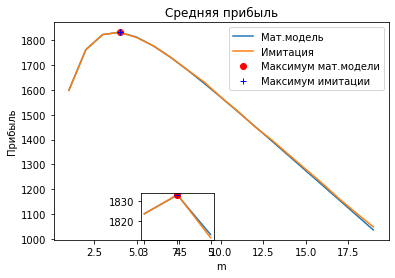

In [4]:
# Рисунки
print("max = ", np.argmax(Y)+1)
print("Максимальная средняя прибыль = ", max(Y))
print("Имитация max  = ", np.argmax(W)+1)
print("Максимальная средняя прибыль = ", max(W))
fig, ax = plt.subplots() 
ax_1 = fig.add_subplot(4, 4, 14)
ax.plot(m,Y,label='Мат.модель')
ax.plot(m,W,label='Имитация')
ax.plot(max1, Y[max1-1],'ro',label='Максимум мат.модели')
ax.plot(max2, W[max2-1],'+',label='Максимум имитации', color = "blue")
ax.legend()
x=list(range(max1-1, max1+2))
x1=list(range(max2-1, max2+2))
y=[Y[i-1] for i in x]
y1=[W[i-1] for i in x1]
ax_1.plot(x,y)
ax_1.plot(x1,y1)
ax_1.plot(max1, Y[max1-1],'ro',label='Максимум мат.модели')
ax_1.plot(max2, W[max2-1],'+',label='Максимум имитации', color = "blue")
ax.set_xlabel("m")                             
ax.set_ylabel("Прибыль")                         
ax.set_title("Средняя прибыль")
plt.show() 

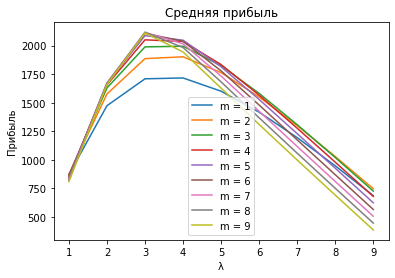

Оптимальные прибыль, размер склада, интенсивность покупателей =  (2116.187907126869, 8, 3)
время работы 1167.4466121196747


In [7]:
# Рисунок для известной интенсивности покупателей  

nu = 3      # интенсивность прихода покупателя
Time=1000 # Время работы имитации
p = 900     # прибыль с продажи
c = 50      # затраты на хранение одной единицы продукции
q = 300     # за переполнение склада
F=10        # затраты на содержание
m= list(range(1,10))
lamb = list(range(1,10))
fig, ax = plt.subplots() 
RS=[]
for i in m:
    R1=[]
    for j in lamb:
        R1.append((Pribl(i,j,nu),i,j))
#        max2=np.argmax(R)+4
    ax.plot(lamb,[R1[i][0] for i in range(len(lamb))], label='m = ' +str(i))
    RS.extend(R1)
ax.set_xlabel(greek_letterz[10])                             
ax.set_ylabel("Прибыль")                         
ax.set_title("Средняя прибыль")
plt.legend()
plt.show() 
print("Оптимальные прибыль, размер склада, интенсивность покупателей = ", max(RS, key=lambda x: x[0]))
print("время работы",  time.time()- start_time )

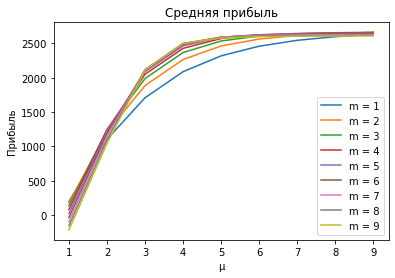

Оптимальные прибыль, размер склада, интенсивность товара =  (2661.896410875539, 3, 9)
время работы 1256.377078294754


In [10]:
# Рисунок для известной интенсивности товара
lamb = 3    # интенсивность прихода вещи на склад
p = 900     # прибыль с продажи
c = 50      # затраты на хранение одной единицы продукции
q = 300     # за переполнение склада
F=10        # затраты на содержание
m= list(range(1,10))
nu = list(range(1,10))
fig, ax = plt.subplots() 
RS=[]
for i in m:
    R=[]
    for j in nu:
        R.append((Pribl(i,lamb,j),i,j)) 
    ax.plot(nu,[R[i][0] for i in range(len(nu))], label='m = ' +str(i))
    RS.extend(R)
ax.set_xlabel(greek_letterz[11])                             
ax.set_ylabel("Прибыль")                         
ax.set_title("Средняя прибыль")
plt.legend()
plt.show() 
print("Оптимальные прибыль, размер склада, интенсивность товара = ", max(RS, key=lambda x: x[0]))
print("время работы",  time.time()- start_time ) 